# MOWNIT
## Lab 6
Jakub Karbowski

In [1]:
using Plots
using Interact
using LinearAlgebra: Tridiagonal, cond
using BenchmarkTools: @elapsed

WebIO._IJuliaInit()

In [2]:
norml1(x, y) = sum(@. abs(x - y) )

norml1 (generic function with 1 method)

In [3]:
function solve(A::Matrix, b::Vector)
    A = [A b]
    
    m, n = size(A)
    
    h = 1
    k = 1
    
    while h <= m && k <= n
        i_max = argmax(i -> abs(A[i, k]), h:m)
        if A[i_max, k] == 0
            k += 1
        else
            A[h, :], A[i_max, :] = A[i_max, :], A[h, :]
            for i = h + 1 : m
                f = A[i, k] / A[h, k]
                A[i, k] = 0
                for j = k + 1 : n
                    A[i, j] = A[i, j] - A[h, j] * f
                end
            end
            h += 1
            k += 1
        end
    end
    
    for i = m : -1 : 1
        A[i, :] .*= 1 / A[i, i]
        for j = i - 1 : -1 : 1
            A[j, :] .-= A[i, :] .* A[j, i]
        end
    end
    
    A[:, end]
end

solve (generic function with 1 method)

# Zadanie 1
\begin{align}
\begin{cases}
a_{1j} = 1 \\
a_{ij} = \frac{1}{i+j-1} \quad i \ne 1
\end{cases} \quad i,j = 1,\dots,n
\end{align}

In [4]:
function makezad1(n, ::Type{T}) where T
    A = zeros(T, n, n)
    A[1, :] .= 1
    A[2:end, :] = [1/(i+j-1) for i=2:n, j=1:n]

    x = rand(T[1, -1], n)
    b = A*x
    
    A, x, b
end

function zad1(n, ::Type{T}) where T
    samples = 100
    sum([begin
        A, x, b = makezad1(n, T)
        xres = solve(A, b)
        norml1(xres, x)
    end for _=1:samples]) / samples
end

function zad1plots(ns)
    f32 = zad1.(ns, Float32)
    f64 = zad1.(ns, Float64)
    
    [ns f32 f64] |> display
    
    [ns cond.([makezad1(n, Float64)[1] for n=ns])] |> display
    
    plot(
        xlabel="n",
        ylabel="Error",
        legend=:topleft,
    )

    plot!(
        ns,
        f32,
        label="Float32",
    )

    plot!(
        ns,
        f64,
        label="Float64",
    )
end

zad1plots (generic function with 1 method)

In [5]:
A, x, b = makezad1(5, Float32)
display(cond(A))
display([x solve(A, b)])

592396.94f0

5×2 Matrix{Float32}:
 -1.0  -0.999941
  1.0   0.999458
 -1.0  -0.998463
  1.0   0.998273
  1.0   1.00067

15×3 Matrix{Float64}:
  1.0    0.0           0.0
  2.0    2.25306e-7    2.39808e-16
  3.0    6.1965e-6     1.84919e-14
  4.0    0.000312565   3.51111e-13
  5.0    0.010024      1.9003e-11
  6.0    0.257578      5.55914e-10
  7.0    6.82462       1.84663e-8
  8.0   15.9272        4.11299e-7
  9.0   31.9168        1.78731e-5
 10.0   24.7419        0.000371851
 11.0   80.5203        0.0158857
 12.0   63.1692        0.420056
 13.0   87.7488       17.7441
 14.0  157.662        14.5171
 15.0  416.882        15.5497

15×2 Matrix{Float64}:
  1.0      1.0
  2.0     14.0957
  3.0    482.922
  4.0  17032.9
  5.0      5.91877e5
  6.0      2.03785e7
  7.0      6.98046e8
  8.0      2.38397e10
  9.0      8.12689e11
 10.0      2.76729e13
 11.0      9.41146e14
 12.0      3.46624e16
 13.0      4.57259e18
 14.0      3.76654e17
 15.0      5.77984e17

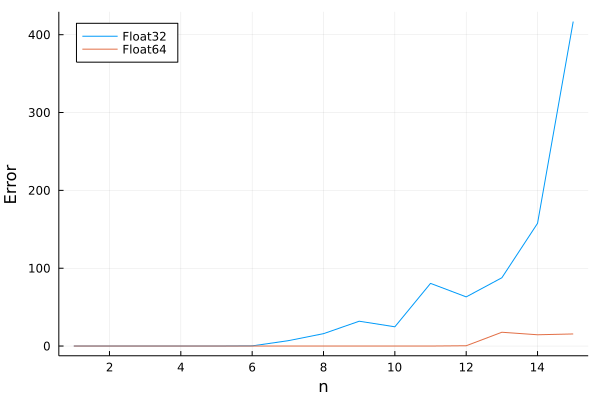

In [6]:
zad1plots(1:15)

# Zadanie 2

In [7]:
function makezad2(n, ::Type{T}) where T
    a(i, j) = j >= i ? 2i/j : a(j, i)
    A = T[a(i, j) for i=1:n, j=1:n]

    x = rand(T[1, -1], n)
    b = A*x
    
    A, x, b
end

function zad2(n, ::Type{T}) where T
    samples = 100
    sum([begin
        A, x, b = makezad2(n, T)
        xres = solve(A, b)
        norml1(xres, x)
    end for _=1:samples]) / samples
end

function zad2plots(ns)
    f32 = zad2.(ns, Float32)
    f64 = zad2.(ns, Float64)
    
    [ns f32 f64] |> display
    
    [ns cond.([makezad2(n, Float64)[1] for n=ns])] |> display
    
    plot(
        xlabel="n",
        ylabel="Error",
        legend=:topleft,
    )
    
    plot!(
        ns,
        f32,
        label="Float32",
    )

    plot!(
        ns,
        f64,
        label="Float64",
    )
end

zad2plots (generic function with 1 method)

In [8]:
A, x, b = makezad2(3, Float64)
display(cond(A))
display([x solve(A, b)])

6.663295412110752

3×2 Matrix{Float64}:
  1.0   1.0
 -1.0  -1.0
  1.0   1.0

11×3 Matrix{Float64}:
  1.0  0.0          0.0
  6.0  1.81794e-6   2.75557e-15
 11.0  1.28824e-5   2.08544e-14
 16.0  2.99817e-5   5.1783e-14
 21.0  6.65593e-5   1.05549e-13
 26.0  0.000123515  1.98925e-13
 31.0  0.000183176  3.80684e-13
 36.0  0.00029984   6.06261e-13
 41.0  0.000429441  8.65992e-13
 46.0  0.00070211   1.19594e-12
 51.0  0.000917117  1.74418e-12

11×2 Matrix{Float64}:
  1.0     1.0
  6.0    29.0404
 11.0   105.757
 16.0   233.255
 21.0   412.389
 26.0   643.642
 31.0   927.333
 36.0  1263.69
 41.0  1652.89
 46.0  2095.07
 51.0  2590.34

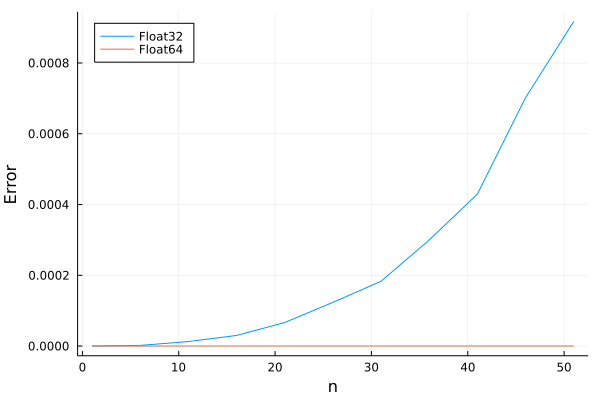

In [9]:
zad2plots(1:5:51)

# Zadanie 3

In [10]:
function solve(A::Tridiagonal{T}, b::Vector{T}) where T
    n = size(A)[1]
    
    c = zeros(T, n - 1)
    c[1] = A[1, 2] / A[1, 1]
    for i = 2 : n - 1
        c[i] = A[i, i + 1] / (A[i, i] - A[i, i - 1] * c[i - 1])
    end
    
    d = zeros(T, n)
    d[1] = b[1] / A[1, 1]
    for i = 2 : n
        d[i] = (b[i] - A[i, i - 1] * d[i - 1]) / (A[i, i] - A[i, i - 1] * c[i - 1])
    end
    
    x = zeros(T, n)
    x[n] = d[n]
    for i = n - 1 : -1 : 1
        x[i] = d[i] - c[i] * x[i + 1]
    end
    
    x
end

solve (generic function with 2 methods)

In [11]:
function makezad3(n, ::Type{T}) where T
    m = 5
    k = 5
    A = Tridiagonal(
        T[k / (i + m + 1) for i = 2:n],
        T[k for i = 1:n],
        T[1 / (i + m) for i = 1:n-1],
    )
    
    x = rand(T[1, -1], n)
    b = A*x
    
    A, x, b
end

function zad3(n, ::Type{T}) where T
    samples = 1000
    sum([begin
        A, x, b = makezad3(n, T)
        xres = solve(A, b)
        norml1(xres, x)
    end for _=1:samples]) / samples
end

function zad3plots(ns)
    f32 = zad3.(ns, Float32)
    f64 = zad3.(ns, Float64)
    
    [ns f32 f64] |> display
    
    [ns cond.([Matrix(makezad3(n, Float64)[1]) for n=ns])] |> display
    
    plot(
        xlabel="n",
        ylabel="Error",
        legend=:topleft,
    )
    
    plot!(
        ns,
        f32,
        label="Float32",
    )

    plot!(
        ns,
        f64,
        label="Float64",
    )
end

zad3plots (generic function with 1 method)

In [12]:
A, x, b = makezad3(5, Float64)

[x solve(A, b)]

5×2 Matrix{Float64}:
 -1.0  -1.0
 -1.0  -1.0
  1.0   1.0
  1.0   1.0
 -1.0  -1.0

21×3 Matrix{Float64}:
    2.0  2.95639e-8  5.72875e-17
   52.0  2.07329e-6  3.02069e-15
  102.0  4.30924e-6  6.9561e-15
  152.0  6.31809e-6  1.00756e-14
  202.0  8.07023e-6  1.39276e-14
  252.0  1.02181e-5  1.74386e-14
  302.0  1.20668e-5  2.17801e-14
  352.0  1.40535e-5  2.52253e-14
  402.0  1.59882e-5  2.87798e-14
  452.0  1.80504e-5  3.31678e-14
  502.0  1.99392e-5  3.75672e-14
  552.0  2.12689e-5  4.07097e-14
  602.0  2.33564e-5  4.41363e-14
  652.0  2.54431e-5  4.78828e-14
  702.0  2.80932e-5  5.23134e-14
  752.0  2.9659e-5   5.62371e-14
  802.0  3.21014e-5  5.96114e-14
  852.0  3.36195e-5  6.25419e-14
  902.0  3.59443e-5  6.66537e-14
  952.0  3.86165e-5  7.08721e-14
 1002.0  4.0261e-5   7.50916e-14

21×2 Matrix{Float64}:
    2.0  1.17175
   52.0  1.27069
  102.0  1.27069
  152.0  1.27069
  202.0  1.27069
  252.0  1.27069
  302.0  1.27069
  352.0  1.27069
  402.0  1.27069
  452.0  1.27069
  502.0  1.27069
  552.0  1.27069
  602.0  1.27069
  652.0  1.27069
  702.0  1.27069
  752.0  1.27069
  802.0  1.27069
  852.0  1.27069
  902.0  1.27069
  952.0  1.27069
 1002.0  1.27069

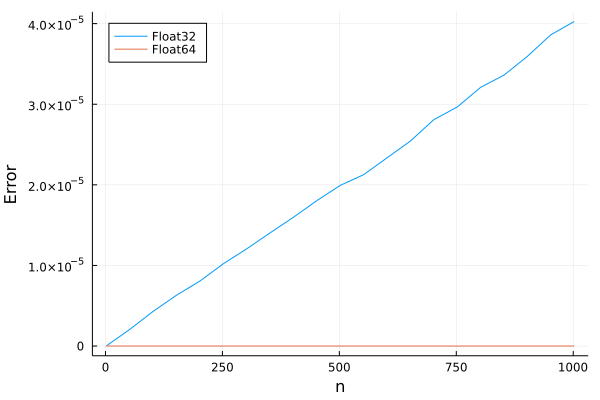

In [13]:
zad3plots(2:50:1002)

# Benchmark

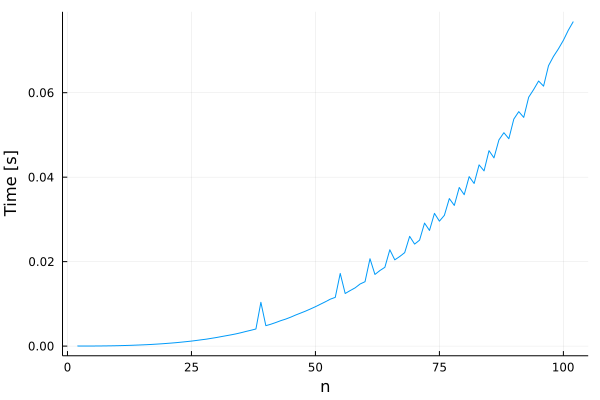

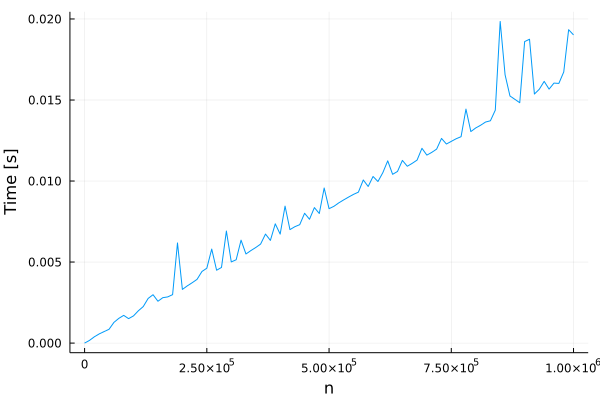

In [14]:
function gauss_bench(n)
    A, x, b = makezad3(n, Float64)
    A = Matrix(A)
    @elapsed solve(A, b)
end

function thomas_bench(n)
    A, x, b = makezad3(n, Float64)
    @elapsed solve(A, b)
end

gns = 2:102
gauss_times = gauss_bench.(gns)

tns = 2:10000:1000002
thomas_times = thomas_bench.(tns)

plot(
    gns,
    gauss_times,
    label=false,
    xlabel="n",
    ylabel="Time [s]",
) |> display

plot(
    tns,
    thomas_times,
    label=false,
    xlabel="n",
    ylabel="Time [s]",
) |> display